In this exercise we will learn how to use image analysis to identify and count seeds from an image collected with a mobile device. In this process we will learn about the concept of image thresholdding, histograms, erosion, dilation, area opening, and binary closing.


**Otsu's thresholding** is an image segmentation method used to automatically determine the optimal threshold value that maximizes the between-class variance and minimizes the intra-class variance of the pixel intensities in a grayscale image.

**Erosion** is used to smooth the boundaries of foreground objects (i.e., objects in white on a black background) in an image. It works by moving a structuring element (a small "kernel" or "mask") over the image and only keeping the pixel in the output image if all the pixels under the structuring element are white. Erosion can be used to remove small white noise from a binary image.

**Dilation** is used to expand the boundaries of foreground objects in an image. It works by moving the structuring element over the image and setting the output pixel to white if at least one pixel under the structuring element is white. Dilation can be used to fill small gaps in a binary image or to merge adjacent objects.

**Area opening** is used to remove small objects or noise from an image while preserving the larger structures. It involves eroding the image and then dilating it with the same structuring element. This operation can be used, for example, to remove small white specks from a black background.

**Binary closing** is used to fill small holes or gaps in objects in an image. It involves dilating the image and then eroding it with the same structuring element. This operation can be used to close small gaps between letters in a text image, for instance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import threshold_otsu
from skimage.morphology import area_opening, disk, binary_closing
from skimage.measure import find_contours, label
from skimage.color import rgb2gray, label2rgb


In [2]:
# Read color image
image_rgb = mpimg.imread('../datasets/images/rice_seeds.jpg')


In [17]:
# Inspect image size
print(image_rgb.shape)


(1622, 1563, 3)


In [3]:
# Convert image to grayscale
image_gray = rgb2gray(image_rgb)


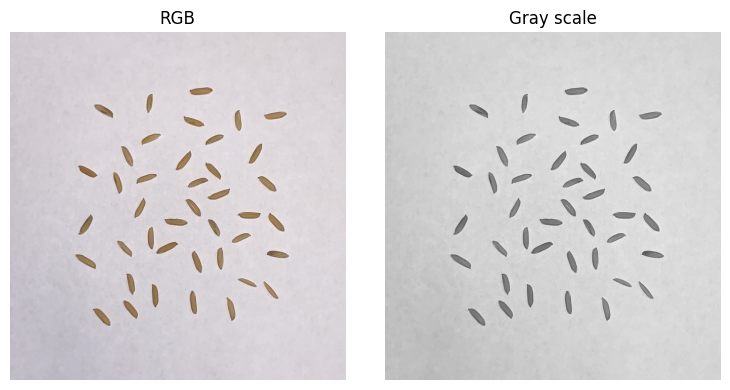

In [4]:
# Visualize rgb and grayscale images
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('RGB')
plt.tight_layout()

plt.subplot(1,2,2)
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title('Gray scale')
plt.tight_layout()

plt.show()


In [7]:
# Segment seeds using a global automated threshold
global_thresh = threshold_otsu(image_gray)
image_binary = image_gray < global_thresh


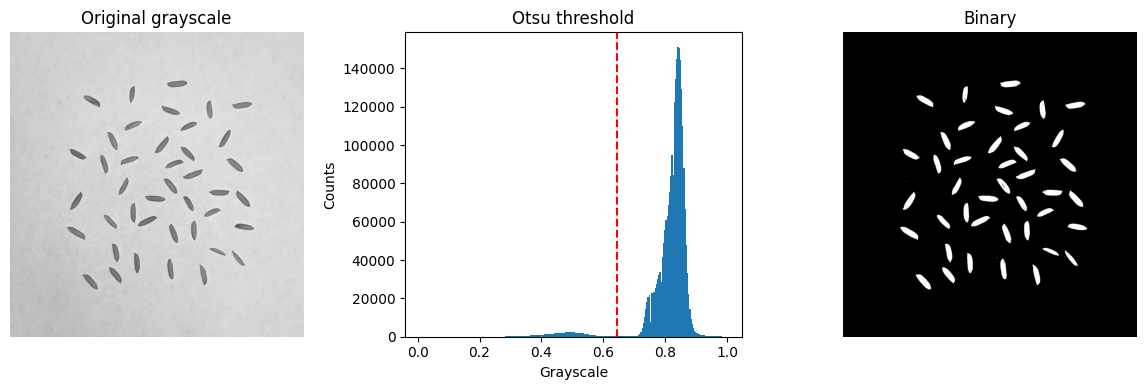

In [8]:
# Display classified seeds and grayscale threshold
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title('Original grayscale')
plt.tight_layout()

plt.subplot(1,3,2)
plt.hist(image_gray.ravel(), bins=256)
plt.axvline(global_thresh, color='r', linestyle='--')
plt.title('Otsu threshold')
plt.xlabel('Grayscale')
plt.ylabel('Counts')

plt.subplot(1,3,3)
plt.imshow(image_binary, cmap='gray')
plt.axis('off')
plt.title('Binary')
plt.tight_layout()

plt.show()


In [9]:
# Area opening to remove small areas (smaller than the typical seed size)
pixel_area = 1000 # area to remove in total pixels
image_binary = area_opening(image_binary, 
                            area_threshold=pixel_area,
                            connectivity=2)


In [18]:
# Closing to fill in holes or connect small, nearby patches
kernel_size = 5
image_binary = binary_closing(image_binary, disk(kernel_size))

# Let's inspect the structuring element
print(disk(kernel_size))


[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


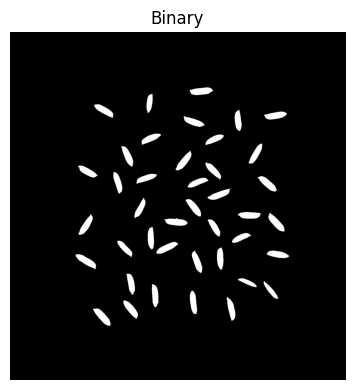

In [19]:
# Display inverted and denoised binary image
plt.figure(figsize=(4,4))

plt.imshow(image_binary, cmap='gray')
plt.axis('off')
plt.title('Binary')
plt.tight_layout()

plt.show()


In [22]:
# Identify seed boundaries
contours = find_contours(image_binary)

# Print number of seeds in image
print('Image contains',len(contours),'seeds')


Image contains 41 seeds


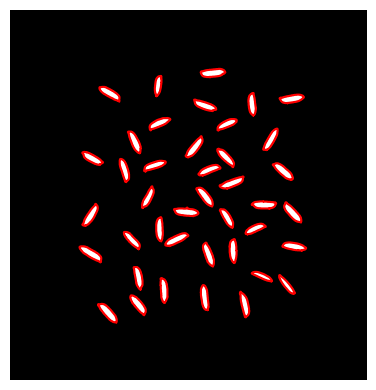

In [23]:
# Plot seed contours
plt.figure(figsize=(4,4))
plt.imshow(image_binary, cmap='gray')
plt.axis('off')
plt.tight_layout()

for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], '-r', linewidth=1.5)
    

In [14]:
# Label image regions
label_image = label(image_binary)
image_label_overlay = label2rgb(label_image, image=image_binary)


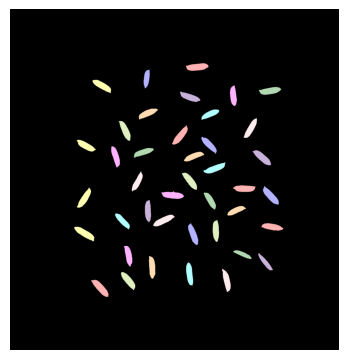

In [24]:
# Display image regions on top of original image
plt.figure(figsize=(4, 4))
plt.imshow(image_label_overlay)
plt.tight_layout()
plt.axis('off')
plt.show()


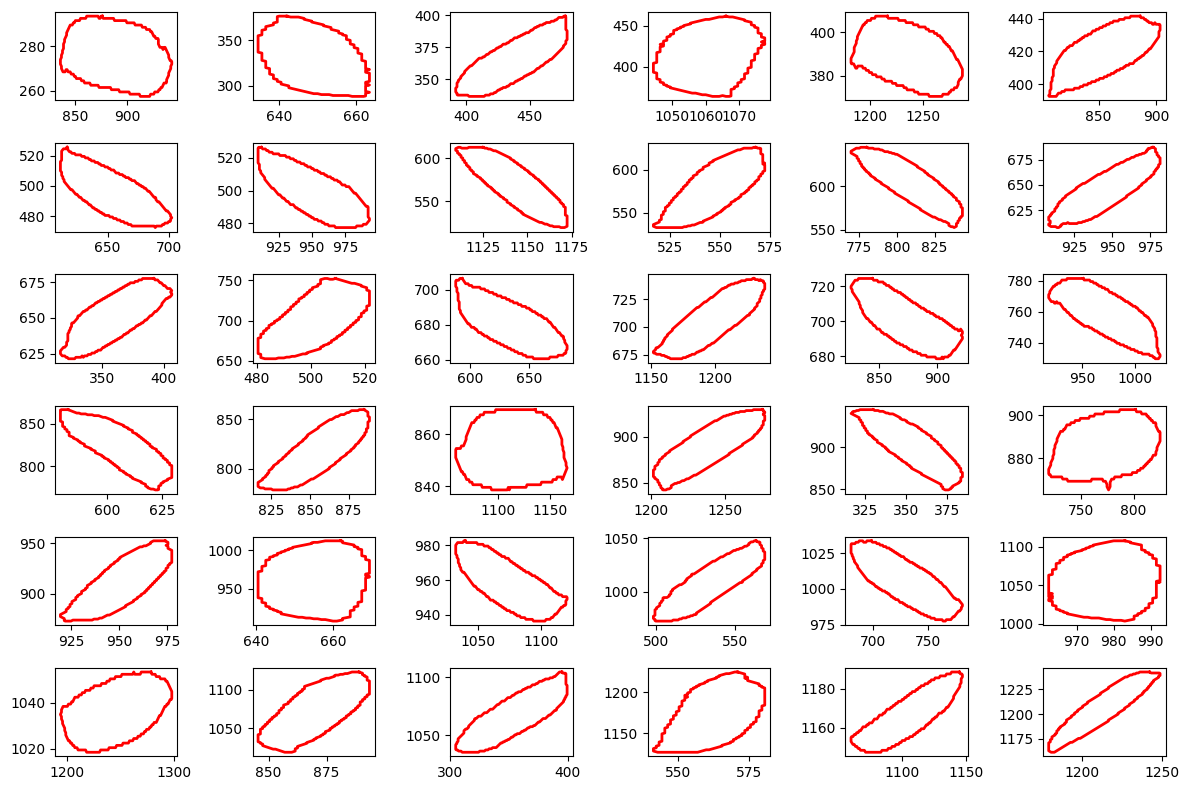

In [28]:
# Display contour for a single seed
plt.figure(figsize=(12, 8))

for seed in range(36):
    plt.subplot(6,6,seed+1)
    plt.plot(contours[seed][:, 1], 
             contours[seed][:, 0], 
             '-r', linewidth=2)
    plt.tight_layout()
plt.show()
